In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
train.sample(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35258,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [6]:
import matplotlib.pyplot as plt

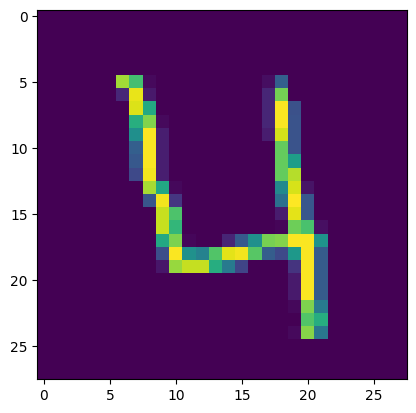

In [7]:
arr = np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(arr)
plt.show()

In [8]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
train.duplicated().sum()

0

# **Feature Engineering**

In [10]:
x = np.array(train)
y = np.array(test)
x_train = x[:,1:]
y_train = x[:,0]
x_test = y

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
x_train = x_train.reshape(-1,28,28,1)
datagen = ImageDataGenerator(
            rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1
)
datagen.fit(x_train)

In [16]:
x_train = x_train.reshape(-1,784)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

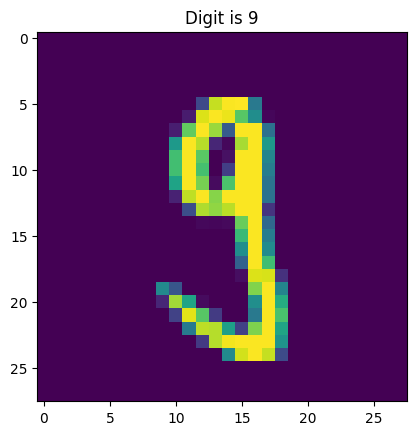

In [23]:
arr = np.array(test.iloc[101,0:]).reshape(28,28)
plt.title(title)
plt.imshow(arr)
plt.show()
title = "Digit is "+str(int(knn.predict(x_test[101].reshape(1,-1))))
